# Q5

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn import preprocessing

df = pd.read_csv("./soccer.csv")

X = df.drop("target", axis=1)
y = df[["target"]]

X_train, y_train = X.iloc[:2560], y.iloc[:2560]
X_test, y_test = X.iloc[2560:], y.iloc[2560:]

In [73]:
X_train = X_train.drop(["home_team", "away_team"], axis=1)
X_test = X_test.drop(["home_team", "away_team"], axis=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = preprocessing.scale(X_train)
X_test = scaler.transform(X_test)

## A) It is necessary to normalize the features to avoid scale and resizing from interfering with the classification.

## B)

In [ ]:
# Logistic Regression
lr = LR()
fitted_lr = lr.fit(X_train, y_train.values.ravel())

y_pred_train_lr = fitted_lr.predict(X_train)
y_pred_test_lr = fitted_lr.predict(X_test)

In [75]:
# LDA 
lda = LDA()
fitted_lda = lda.fit(X_train, y_train.values.ravel())

y_pred_train_lda = fitted_lda.predict(X_train)
y_pred_test_lda = fitted_lda.predict(X_test)

In [76]:
# QDA 
qda = QDA()
fitted_qda = qda.fit(X_train, y_train.values.ravel())

y_pred_train_qda = fitted_qda.predict(X_train)
y_pred_test_qda = fitted_qda.predict(X_test)

In [77]:
# Naive Bayes
nb = NB()
fitted_nb = nb.fit(X_train, y_train.values.ravel())

y_pred_train_nb = fitted_nb.predict(X_train)
y_pred_test_nb = fitted_nb.predict(X_test)

In [ ]:
# KNN with k=5
knn = kNN(n_neighbors=5)
fitted_knn = knn.fit(X_train, y_train.values.ravel())

y_pred_train_knn = fitted_knn.predict(X_train)
y_pred_test_knn = fitted_knn.predict(X_test)

## C)

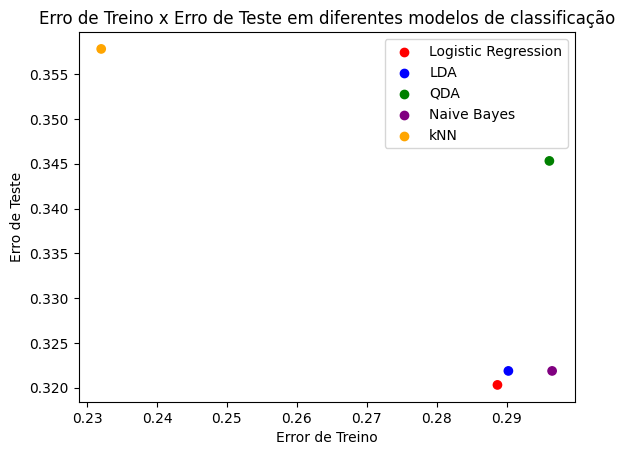

In [ ]:
color_list = ['red', 'blue', 'green', 'purple', 'orange']

taxa_erro_treino_lr = (y_pred_train_lr != y_train.values.ravel()).sum() / len(y_train)
taxa_erro_teste_lr = (y_pred_test_lr != y_test.values.ravel()).sum() / len(y_test)

taxa_erro_treino_lda = (y_pred_train_lda != y_train.values.ravel()).sum() / len(y_train)
taxa_erro_teste_lda = (y_pred_test_lda != y_test.values.ravel()).sum() / len(y_test)

taxa_erro_treino_qda = (y_pred_train_qda != y_train.values.ravel()).sum() / len(y_train)
taxa_erro_teste_qda = (y_pred_test_qda != y_test.values.ravel()).sum() / len(y_test)

taxa_erro_treino_nb = (y_pred_train_nb != y_train.values.ravel()).sum() / len(y_train)
taxa_erro_teste_nb = (y_pred_test_nb != y_test.values.ravel()).sum() / len(y_test)

taxa_erro_treino_knn = (y_pred_train_knn != y_train.values.ravel()).sum() / len(y_train)
taxa_erro_teste_knn = (y_pred_test_knn != y_test.values.ravel()).sum() / len(y_test)

plt.scatter(
    [taxa_erro_treino_lr, taxa_erro_treino_lda, taxa_erro_treino_qda, taxa_erro_treino_nb, taxa_erro_treino_knn], 
    [taxa_erro_teste_lr, taxa_erro_teste_lda, taxa_erro_teste_qda, taxa_erro_teste_nb, taxa_erro_teste_knn], 
    c=color_list
)
for i, model in enumerate(['Logistic Regression', 'LDA', 'QDA', 'Naive Bayes', 'kNN']):
    plt.scatter([], [], c=color_list[i], label=model)
    
plt.xlabel('Training Error')
plt.ylabel('Test Error')
plt.title('Training Error vs Test Error in Different Classification Models')
plt.legend()
plt.show()

## D)

### According to the graph, we can notice that the training error decreases along with the value of k. In other words, models with lower k tend to fit the training data better.

### However, it is possible to observe that the decrease in the value of k tends to increase the test error, which indicates that this decrease is causing overfitting in the model.

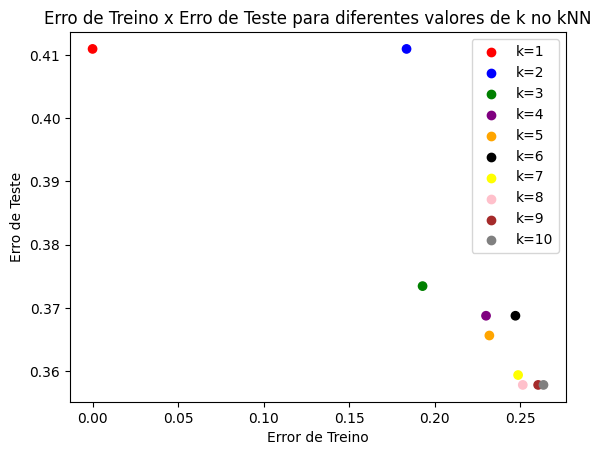

In [ ]:
## Multiple kNN

color_list = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'yellow', 'pink', 'brown', 'gray']

error_list = []
for i in range(1, 11):
    knn = kNN(n_neighbors=i)

    fitted_knn = knn.fit(X_train, y_train.values.ravel())

    y_pred_treino_knn = fitted_knn.predict(X_train)
    y_pred_test_knn = fitted_knn.predict(X_test)

    error_treino = (y_pred_treino_knn != y_train.values.ravel()).sum() / len(y_train)
    erro_teste = (y_pred_test_knn != y_test.values.ravel()).sum() / len(y_test)

    error_list.append((error_treino, erro_teste))

plt.scatter(
    x=[error[0] for error in error_list],
    y=[error[1] for error in error_list],
    c=color_list
)
for i, k in enumerate(range(1, 11)):
    plt.scatter([], [], c=color_list[i], label=f'k={k}')

plt.xlabel('Training Error')
plt.ylabel('Test Error')
plt.title('Training Error vs Test Error for different k values in kNN')
plt.legend()
plt.show()